# Feuille 1 

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## Exercice 1 : Méthode de Newton

La méthode de Newton permet de calculer (de manière approchée) les zéros d'une fonction. Il s'agit d'une méthode itérative. Elle consiste donc a créer une suite dont on espère la convergence vers un zéro de la fonction que l'on considère. Commençons avec une fonction $f :\mathbb{R}\rightarrow \mathbb{R}$. Nous cherchons $x^\ast\in\mathbb{R}$ tel que $f(x^\ast) = 0$. Nous devons fournir une première approximation de $x^\ast$ que nous allons noter $x^{(0)}$.
La méthode de Newton consiste alors à construire la suite $x^{(n)}$ avec le procédé décrit sur le graphique ci-dessous. Le $(n)$ n'est pas une puissance mais représente seulement l'indice de la suite.

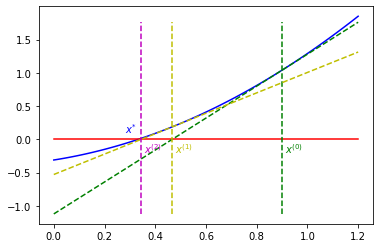

In [169]:
#Ce bout de code ne fait pas partie du TP, il permet simplement de produire la figure ci-dessous pour expliquer la méthode de Newton.
f = lambda x: (x+0.3)**2-0.4
df =  lambda x: 2*(x+0.3)
xs = np.sqrt(0.4)-0.3
x0 = 0.9
x1 = x0 - f(x0)/df(x0)
x2 = x1 - f(x1)/df(x1)
xp = np.linspace(0,1.2,100) 
yp = df(x0)*(xp-x0)+f(x0) ;
plt.plot(xp,f(xp),'b')
plt.plot(xp,np.zeros(np.size(xp)),'r')
plt.plot(x0*np.ones(np.size(yp)),yp,'g--')
plt.text(x0+0.01,-0.2,'$x^{(0)}$',color='g')
plt.plot(xp, df(x0)*(xp-x0)+f(x0),'g--')
plt.plot(x1*np.ones(np.size(yp)),yp,'y--')
plt.text(x1+0.01,-0.2,'$x^{(1)}$',color='y')
plt.plot(xp, df(x1)*(xp-x1)+f(x1),'y--')
plt.plot(x2*np.ones(np.size(yp)),yp,'m--')
plt.text(x2+0.01,-0.2,'$x^{(2)}$',color='m')
plt.text(xs-0.05,0.1,'$x^{*}$',color='b');

A partir de $x^{(0)}$, nous remontons sur la courbe $y=f(x)$. Nous traçons la tangente à la courbe en ce point et $x^{(1)}$ est défini à l'intersection de cette tangente avec l'axe des abscisses. Le procédé est répété à partir de $x^{(1)}$ pour définir $x^{(2)}$ et ainsi de suite. Nous observons sur le graphique ci-dessus que la convergence de cette méthode est très rapide. Elle consiste simplement à remplacer la fonction non-linéaire par la version linéaire qui l'approche le mieux autour du point $x^{(n)} (c'est à dire la tangente), résoudre ce problème linéaire et répéter le processus pour obtenir après un certain nombre d'itération la solution du problème non-linéaire.

Il est facile alors d'obtenir la formule de la méthode de Newton si l'on a retenu le dessin ci-dessus et le principe de la méthode. Partant de $x^{(n)}$, on cherche l'équation de la tangente. C'est la droite de pente $f'(x^{(n)})$ qui passe par le point $(x^{(n)},f(x^{(n)}))$. Son équation est $y = f'(x^{(n)})\Big(x-x^{(n)}\Big) + f(x^{(n)})$. Le point $x^{(n+1)}$ est défini comme l'intersection de cette droite et de l'axe des abscisses. C'est à dire que lorsque $x=x^{(n+1)}$ dans l'équation, on obtient $y=0$. Cela conduit à la formule $0= f'(x^{(n)})\Big(x^{(n+1)}-x^{(n)}\Big) + f(x^{(n)})$ ou encore
$$
x^{(n+1)} = x^{(n)} - \dfrac{f(x^{(n)})}{f'(x^{(n)})}.
$$
La première itérée $x^{(0)}$ étant connue, cela défini entièrement la suite $x^{(n)}$.

Lorsque la fonction dépend de plusieurs variables le principe est le même. Supposons maintenant que $f:\mathbb{R}^d\rightarrow\mathbb{R}^d$. La fonction dépend de $d$ variables, c'est le $\mathbb{R^d}$ à gauche de la flèche. Lorsque nous cherchons $x^\ast\mathbb{R}^d$ tel que $f(x^\ast)=0$. Il s'agit donc d'un problème avec $d$ inconnues. A noter que dans ce cas, on suppose que la fonction est également à valeur dans $\mathbb{R}^d$,  c'est le $\mathbb{R^d}$ à droite de la flèche. Ceci signifie que nous disposons de $d$ équations pour résoudre notre problème. En effet $f(x^\ast)=0$ est alors à comprendre dans $\mathbb{R}^d$, la fonction $f$ a $d$ composantes que l'on cherche à annuler simultanément. Nous supposons donc que nous avons autant d'équations que d'inconnues, c'est moral pour éviter d'obtenir un problème sous-déterminé (infinité de solutions) ou sur-déterminé (risque d'absence de solution).

Dans ce cas là, la méthode de Newton consiste à calculer la suite $X^{(n)}$ définie par
$$
 X^{(n+1)}  = X^{(n)} - \left[ J_f(X^{(n)}) \right]^{-1} f(X^{(n)}),
$$
avec $X^{(0)}$ donné.

### Question 1
La fonction et sa dérivée

In [170]:
def f1(x):
    return np.exp(-x)-x 
def df1(x):
    return -np.exp(-x)-1

Avant de passer à la suite, je teste ma fonction. Je regarde si le résultat a bien le type attendu (ici un réel)

In [171]:
f1(2), df1(2)

(-1.8646647167633872, -1.1353352832366128)

Faisons un graphique pour localiser approximativement les zéros de la fonction f1

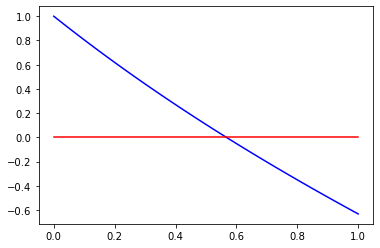

In [172]:
xp = np.linspace(0,1,100) 
plt.plot(xp,f1(xp),'b')
plt.plot(xp,np.zeros(np.size(xp)),'r')

Il semble que la courbe de la fonction (en bleu) coupe l'axe des abscisses (en rouge) en un seul point (d'abscisse proche de 0.6). Ainsi la fonction f1 semble n'admettre qu'un seul 0 et la valeur x en laquelle est atteint ce zéro (valeur que nous cherchons) est proche de 0.6.

La fonction Newton est codée ci-dessous pour n'importe quelle fonction f (de dérivée df). Les arguments en entrée de la fonction Newton sont la fonction f, sa dérivée df, la donnée initiale x0 (premier élément de la suite), la tolérance eps et le nombre d'itération maximal nitmax. La tolérance est utilisée dans le critère d'arrêt. Une première possibilité est de s'arrêter lorsque le résidu devient petit:
$$ |f(x^{(n})| < \epsilon.$$ Une seconde possibilité est de s'arrêter lorsque l'incrément devient petit:
$$ | x^{(n+1)} - x^{(n)} | < \epsilon.$$ Les deux possiblités peuvent être utisées (cf les deux fonctions Newton ci-dessous). Dans les deux cas, on ajoute une sécurité pour que la boucle se termine toujours, le nombre d'itérations ne sera jamais supérieur à nitmax. 

In [173]:
def Newton_residu(f,df,x0,eps,nitmax):
    x = x0 #initialisation
    nit = 0 #compteur du nombre d'iterations
    while( np.abs(f(x))>eps and nit<nitmax ):
        x = x - f(x)/df(x) #mise à jour dans la méthode de Newton
        nit = nit + 1 # mise a jour du compteur
    return x, nit

In [174]:
def Newton_increment(f,df,x0,eps,nitmax):
    x = x0 #initialisation
    nit = 0 #compteur du nombre d'iterations
    x_old = x + 1 #intialisation de x_old, il faut une valeur qui autorise à rentrer dans la boucle, ici x - x_old = 1 superieur a eps
    while( np.abs(x-x_old)>eps and nit<nitmax ):
        x_old = x #sauvegarde pour le critère d'arrêt
        x = x - f(x)/df(x) #mise à jour dans la méthode de Newton
        nit = nit + 1 # mise a jour du compteur
    return x, nit

Les fonctions ci-dessus renvoient l'itérée finale et le nombre d'itération effectuée. A noter: une seule variable x est utilisée dans l'algorithme pour représenter la suite. Les itérées successives ne sont pas stockées, ce serait inutile ici. Pour le critère sur l'incrément nous avons besoin d'une variable supplémentaire x_old puisque le critère fait intervenir deux éléments successifs de la suite. Il faut stocker l'itérée courante avant sa mise à jour pour pouvoir l'utiliser dans le critère.

Testons nos fonctions. 

Il faut choisir une valeur initiale pour notre suite. Il convient de la choisir proche du zéro pour augmenter les chances de convergence de la méthode de Newton. Prenons x0=0.6 puisque nous avons observé sur le graphique que la racine de la fonction est proche de 0.6.

La tolérance doit être très petite puisque nous souhaitons une précision élevée. Par exemple nous pouvons exiger que
$|f(x^{(n)})|<10^{-10}$
puisque nous souhaitons trouver une approximation de la solution de $f(x)=0$. Idem pour le critère sur l'incrément.

La méthode de Newton converge très rapidement (lorsqu'elle converge!). On peut prendre un nombre d'itération maximum relativement faible. 

In [175]:
x0 = 0.6
eps = 1e-10
nitmax = 15

In [176]:
Newton_residu(f1,df1,x0,eps,nitmax)

(0.5671432904097838, 3)

Nous avons obtenu 0.5671432904097838 pour la valeur approchée de notre racine. L'algorithme a convergé en 3 itérations.

In [177]:
Newton_increment(f1,df1,x0,eps,nitmax)

(0.5671432904097838, 4)

En changeant le critère, nous obtenons la même valeur approchée mais l'algorithme aura effectué 4 itérations pour satisfaire le critère.

### Question 2
La fonction et sa dérivée suivie du graphique 

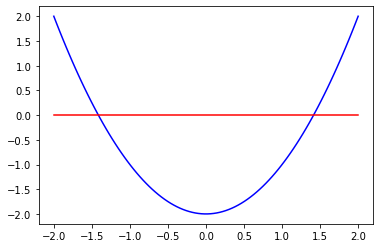

In [178]:
def f2(x):
    return x**2-2 
def df2(x):
    return 2*x
xp = np.linspace(-2,2,100) 
plt.plot(xp,f2(xp),'b')
plt.plot(xp,np.zeros(np.size(xp)),'r')

Il y a deux racines cette fois : $x=\pm \sqrt{2}$. Nous pouvons directement appliquer la méthode de Newton pour obtenir des valeurs approchées.

In [179]:
eps = 1e-10
nitmax = 15

In [180]:
x0 = -1
Newton_residu(f2,df2,x0,eps,nitmax)

(-1.4142135623746899, 4)

In [181]:
x0 = 1
Newton_residu(f2,df2,x0,eps,nitmax)

(1.4142135623746899, 4)

Nous observons que nous convergeons vers l'une ou l'autre des deux racines selon le choix de l'initialisation.

### Question 3

La fonction et sa dérivée. Attention la fonction est de $\mathbb{R}^2 \rightarrow \mathbb{R}^2$, sa "dérivée" est donc une matrice, c'est la matrice Jacobienne. La première ligne contient les dérivées partielles de la première composante (dans la première colonne par rapport à la première variable $x$ et dans la seconde colonne par rapport à la seconde variable $y$), la deuxième ligne contient les dérivées partielles de la seconde composante. 

In [182]:
def f3(X):
    x = X[0]
    y = X[1]
    return np.array([np.exp(x)-y,x**2+y**2-16])

In [183]:
def df3(X):
    x = X[0]
    y = X[1]
    return np.array([[np.exp(x),-1],[2*x,2*y]])

Pour avoir une représentation graphique utile, il ne faut pas chercher à faire des graphiques 3D qui seront difficilement lisibles. Nous cherchons un zero de la fonction $f3$, ceci signifie que nous cherchons $(x^\ast,y^\ast)$
tel que $f3(x^\ast,y^\ast) = 0$ dans $\mathbb{R}^2$ ou encore
$$
\left[
\begin{array}{cc}
  \exp(x^\ast) - y^\ast \\
  (x^\ast)^2+(y^\ast)^2-16
\end{array}
\right]
=\left[
\begin{array}{cc}
  0\\
  0
\end{array}
\right]
$$
Ceci s'écrit finalement $y^\ast=\exp(x^\ast)$ et $(x^\ast)^2+(y^\ast)^2=16$. Si l'on se place dans le plan $(x,y)$, ces deux égalités signifient que le point $(x^\ast,y^\ast)$ est à l'intersection des courbes 
$y=\exp(x)$ (courbe d'une exponentielle) et $x^2+y^2=16$ (centre de centre $(0,0)$ et de rayon 4). Représentons ces deux courbes sur un graphique.  

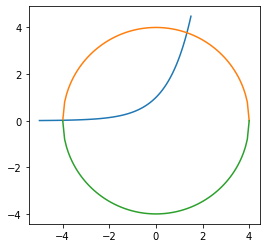

In [184]:
xp = np.linspace(-5,1.5,100)
plt.plot(xp,np.exp(xp))
xp = np.linspace(-4,4,100)
plt.plot(xp,np.sqrt(16-xp**2))  # le cercle est tracée en deux fois
plt.plot(xp,-np.sqrt(16-xp**2)) # le cercle est tracée en deux fois
plt.gca().set_aspect(aspect = 'equal') # pour une echelle identique sur les deux axes

Il y a deux intersections. On peut localiser approximativement les racines $(-4,0)$ et (1.5,3.5). Ce seront nos points de départ pour la méthode de Newton.

Il faut créer une fonction adaptée aux fonctions de plusieurs variables. La variable x devient un vecteur (dans notre exemple il sera de taille 2). Il faut utiliser la fonction la.norm à la place de np.abs dans le critère d'arrêt puisque nous avons maintenant des vecteurs. Il faut également "inverser" la jacobienne, cela se fait sans calculer l'inverse mais en utilisant la fonction la.solve qui permet de résoudre les système linéaire. Nous souhaitons calculer
$$ \big[J_f(x)\big]^{-1} f(x).$$ Il s'agit en fait de la solution du système linéaire $Ay=b$ avec $A=J_f(x)$ et $b=f(x)$. En effet cette solution n'est rien d'autre que $A^{-1}b$ c'est à dire $\big[J_f(x)\big]^{-1} f(x)$. Pour l'obtenir il suffit d'utiliser la commande la.solve(A,b) (cf ci-dessous).

In [185]:
def Newton(f,df,x0,eps,nitmax):
    x = x0 #initialisation
    nit = 0 #compteur du nombre d'iterations
    x_old = x + np.ones(np.size(x)) #intialisation de x_old, il faut une valeur qui autorise à rentrer dans la boucle, ici x - x_old = (1,...,1) de norme superieur a eps
    while( la.norm(x-x_old)>eps and nit<nitmax ):
        x_old = x #sauvegarde pour le critère d'arrêt
        x = x - la.solve(df(x),f(x)) #mise à jour dans la méthode de Newton
        nit = nit + 1 # mise a jour du compteur
    return x, nit

Cherchons maintenant nos deux racines

In [186]:
eps = 1e-10
nitmax = 15

In [187]:
x0 = np.array([-4,0])
Newton(f3,df3,x0,eps,nitmax)

(array([-3.99995806,  0.01831641]), 4)

In [188]:
x0 = np.array([1.5,3.5])
Newton(f3,df3,x0,eps,nitmax)

(array([1.32790999, 3.77314922]), 5)